# 4.10 Part 1: Customer Data Analysis

   #### Contents
    01. Import data and libraries
    02. Check data, consider security
    03. Regional coding
    04. Exclude low-activity customers
    05. Define and visualize a new variable: 'household' type
    06. Explore spending habits of household types
    07. Explore variations
    07. Visualize patterns found
    08. Export data

## 01. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path to data

path = r'/Users/louise/Desktop/CF Coursework/Achievement 4 /Instacart Basket Analysis'

In [3]:
# Import prepared data


ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_products_customers.pkl'))

## 02. Check data, consider security of PII

In [10]:
ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,num_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [4]:
# Drop _merge column and shorten name to df

df = ords_prods_merge.drop(columns = ['_merge'])

In [6]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Infrequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Infrequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Infrequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Infrequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Infrequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


Security considerations: The customers data in orders_products_cutomers just uploaded contains clear personal identifiers. Fortunately, however, it has been fabricated for the purpose of this exercise, so no actual humans are being identified here.

## 03. Regional coding

In [5]:
# Make a dictionary defining the region of each U.S. state

states_to_regions = {
    'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Nevada': 'West',
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Utah': 'West',
    'Colorado': 'West', 'Alaska': 'West', 'Hawaii': 'West', 'Maine': 'Northeast',
    'Vermont': 'Northeast', 'New York': 'Northeast', 'New Hampshire': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'Wisconsin': 'Midwest',
    'Illinois': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'West Virginia': 'South', 'District of Columbia': 'South', 'Maryland': 'South',
    'Virginia': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'North Carolina': 'South',
    'Mississippi': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Alabama': 'South',
    'Georgia': 'South', 'South Carolina': 'South', 'Florida': 'South', 'Delaware': 'South',
    'Arizona': 'Southwest', 'New Mexico': 'Southwest', 'Oklahoma': 'Southwest',
    'Texas': 'Southwest'}

In [13]:
print(states_to_regions.get('Washington'))

West


In [6]:
# Create a column in the dataframe defining region based on state

df['region'] = df['state'].map(states_to_regions)

In [7]:
df['region'].value_counts()

South        9499752
Midwest      7597325
West         6984455
Northeast    5722736
Southwest    2600591
Name: region, dtype: int64

In [12]:
# Crosscheck region with spending_flag

crosstab = pd.crosstab(df['region'], ords_prods_merge['spending_flag'], dropna = False)

In [104]:
crosstab.to_clipboard()

In all 5 regions, high spenders only make up about 2% of customers. The highest percentage is in the Midwest, at 2.05%, the lowest in the Northeast at 1.89% 

## 04. Exclude low-activity customers

In [8]:
# Flag customers with low total orders

result = []

for value in df['max_order']:
  if value < 5:
    result.append('low-activity customer')
  else:
    result.append('Regular activity customer')

In [9]:
# Add as column to df

df['activity_flag'] = result

In [10]:
# Check output

df['activity_flag'].value_counts()

Regular activity customer    30964564
low-activity customer         1440295
Name: activity_flag, dtype: int64

In [11]:
# Create a subset of low-activity customers. 

df[df['activity_flag'] == 'low-activity customer']

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,date_joined,num_of_dependants,marital_status,income,region,activity_flag
1510,520620,120,1,3,11,NaN,196,2,0,Soda,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low-activity customer
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low-activity customer
1512,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low-activity customer
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low-activity customer
1514,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low-activity customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404828,1947537,166751,3,4,7,0.0,49001,1,1,Melatonin 2.5 Mg Sublingual Orange Tablets,...,Glass,Female,Oregon,38,8/17/2018,1,married,41766,West,low-activity customer
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,South,low-activity customer
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,South,low-activity customer
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,South,low-activity customer


In [12]:
# Make subset into dataframe

df_low_act = df[df['activity_flag'] == 'low-activity customer']

In [13]:
# Make a dataframe excluding low-activity customers

df_active = df[df['activity_flag'] == 'Regular activity customer']

In [14]:
# Export low_act to file 

df_low_act.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_act_customers.pkl'))

## 05. Define a new variable: household type

In [16]:
# Flag active customers as parent/guardians or no dependants to explore

df_active.loc[df_active['num_of_dependants'] > 0, 'parent_loc'] = 'Parent/Guardian'

/var/folders/3y/d862clgs063359n86dbrcz7r0000gn/T/ipykernel_55611/4264595490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['num_of_dependants'] > 0, 'parent_loc'] = 'Parent/Guardian'


In [22]:
df_active.loc[df_active['num_of_dependants'] == 0, 'parent_loc'] = 'No Dependants'

In [23]:
# Check outputs

df_active['parent_loc'].value_counts()

Parent/Guardian    23224883
No Dependants       7739681
Name: parent_loc, dtype: int64

In [24]:
# Crosscheck parent_loc with marital_satus

crosstab = pd.crosstab(df_active['parent_loc'], df_active['marital_status'], dropna = False)

In [25]:
crosstab

marital_status,divorced/widowed,living with parents and siblings,married,single
parent_loc,,,,
No Dependants,2645271,0,0,5094410
Parent/Guardian,0,1481172,21743711,0


In [29]:
crosstab.to_clipboard()

In [15]:
# Create a column labeling customers' households as single, nuclear, or multigenerational

df_active.loc[df_active['num_of_dependants'] == 0, 'household'] = 'single adult'

/var/folders/3y/d862clgs063359n86dbrcz7r0000gn/T/ipykernel_58737/3780604555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['num_of_dependants'] == 0, 'household'] = 'single adult'


In [16]:
df_active.loc[df_active['marital_status'] == 'married', 'household'] = 'nuclear fam'

In [17]:
df_active.loc[df_active['marital_status'] == 'living with parents and siblings', 'household'] = 'multi-gen fam'

In [18]:
# Check outputs 

df_active['household'].value_counts()

nuclear fam      21743711
single adult      7739681
multi-gen fam     1481172
Name: household, dtype: int64

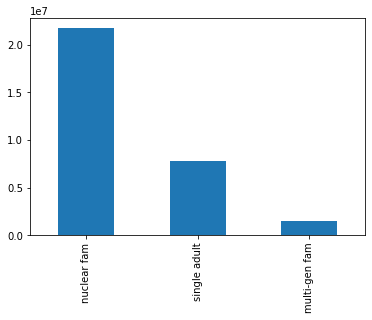

In [40]:
# Create a bar graph of household types

bar = df_active['household'].value_counts().plot.bar()

In [41]:
# Save visualization to folder

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_household_type.png'))

##   06. Explore spending habits of household types

In [79]:
# Find the maximum, minimum, and average number of a user's total orders for each household type

df_active.groupby('household').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                    mean min max
household                       
multi-gen fam  34.853070   5  99
nuclear fam    34.307533   5  99
single adult   34.675839   5  99

In [80]:
# Find the maximum, minimum, and mean average price of products purchaced for each household type

df_active.groupby('household').agg({'avg_price': ['mean', 'min', 'max']})

avg_price                     
                   mean       min        max
household                                   
multi-gen fam  7.800588  2.133333  14.900000
nuclear fam    7.790281  1.000000  20.114286
single adult   7.789552  1.000000  16.931250

In [73]:
# Crosscheck household with spending_flag

crosstab = pd.crosstab(df_active['household'], df_active['spending_flag'], dropna = False)

In [74]:
crosstab

spending_flag,High Spender,Low Spender
household,,
multi-gen fam,27926,1453246
nuclear fam,429457,21314254
single adult,146042,7593639


In [75]:
crosstab.to_clipboard()

## 07. Explore variations in spending habits of customers by region and product department

In [76]:
# Crosscheck household with region

crosstab = pd.crosstab(df_active['household'], df_active['region'], dropna = False)

In [77]:
crosstab

region,Midwest,Northeast,South,Southwest,West
household,,,,,
multi-gen fam,351435,256430,450300,107179,315828
nuclear fam,5087262,3853773,6368894,1716872,4716910
single adult,1822816,1354482,2254717,664553,1643113


In [78]:
crosstab.to_clipboard()

Household types are spread fairly evenly across regions

In [10]:
# Create big and small (70/30) random subsets to use in line charts

np.random.seed(4)
dev = np.random.rand(len(df_active)) <= 0.7

In [11]:
big = df_active[dev]
small = df_active[~dev]

In [12]:
# Check lengths (big + small should = 30964564)

len(big) + len (small)

30964564

In [22]:
# Define a new dataframe from small with limited columns 

df_act2 = small[['spending_flag', 'avg_price','household', 'region']]

In [33]:
df_act2.head()

,spending_flag,avg_price,household,region
0,Low Spender,6.367797,nuclear fam,South
2,Low Spender,6.367797,nuclear fam,South
3,Low Spender,6.367797,nuclear fam,South
6,Low Spender,6.367797,nuclear fam,South
10,Low Spender,6.367797,nuclear fam,South


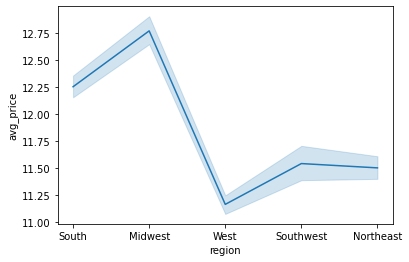

In [35]:
# Create a line plot mapping region against avg price of items purchased

line = sns.lineplot(data = df_act2, x = 'region', y = 'avg_price')

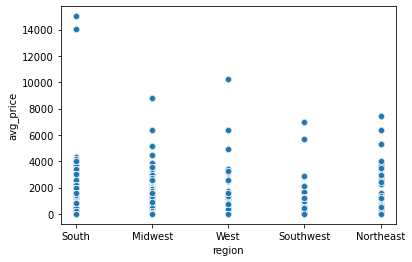

In [23]:
# This is surprising, maybe there's an outlier. Create a scatter plot mapping region against avg price of items purchased

scatter_region = sns.scatterplot(x = 'region', y = 'avg_price',data = df_act2)

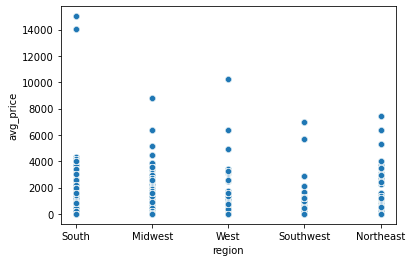

In [21]:
# Compare to big df

scatter_region = sns.scatterplot(x = 'region', y = 'avg_price',data = big)

The big and small random samples look similar enough that I am willing to trust that the higher avg prices in the South and Midwest regions are genuinely reflective of the data

In [39]:
# Save visualizations to folder

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_region_price.png'))

scatter_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_region_price.png'))

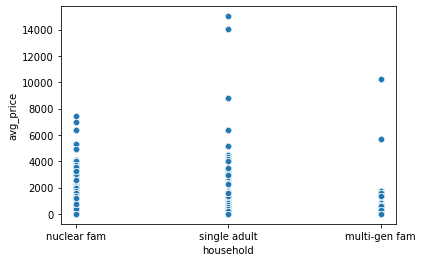

In [40]:
# Create a scatter plot mapping household type against avg price of items purchased

scatter = sns.scatterplot(x = 'household', y = 'avg_price',data = df_act2)

In [41]:
# Save visualization to folder

scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_household_price.png'))

## 08. Re-import df_active to answer key questions


In [4]:
# Re-import df_active (adding visualizations later to answer key questions)

df_active = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','active_customers.pkl'))

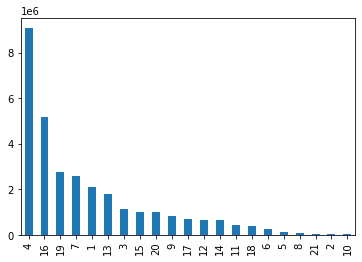

In [5]:
# Are there certain types of products which are more popular than others?

bar = df_active['department_id'].value_counts().plot.bar()

In [9]:
# Save visualization to folder

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_departments.png'))

In [7]:
# Import dapartments wrangled


df_deps = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','departments_wrangled.csv'))

In [8]:
df_deps

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


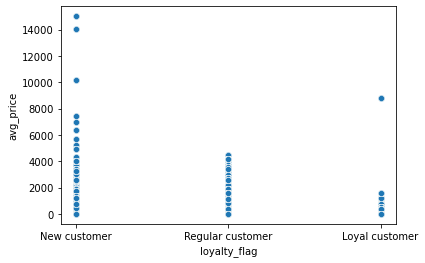

In [17]:
# Are there differences in spending habits based on loyalty status?

scatter_loaylty = sns.scatterplot(x = 'loyalty_flag', y = 'avg_price',data = small)

In [19]:
# Save visualization to folder

scatter_loaylty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_loyalty.png'))

## 08. Export final dataframe

In [44]:
# Export final version of df_active 

df_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_customers.pkl'))